In [31]:
%matplotlib inline

In [32]:
import torch

In [33]:
torch.cuda.current_device()

0

In [34]:
torch.cuda.device(0)

In [35]:
torch.cuda.device_count()

1

In [36]:
torch.cuda.get_device_name(0)

'Quadro P5000'

In [37]:
torch.cuda.is_available()

True

In [38]:
from fastai2.tabular.all import *

In [39]:
import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12
mpl.rcParams['figure.figsize'] = 8, 6
%config InlineBackend.figure_format='retina'

In [40]:
path = untar_data("https://storage.googleapis.com/sv-fastai/datasets/apthunt/apthuntdata.tgz",
          dest=".",
#           force_download=true
          )

In [41]:
path.ls()

(#1) [Path('apthuntdata/data.csv')]

In [42]:
df_nn = pd.read_csv(path/'data.csv', low_memory=False)

In [43]:
df_nn.describe()

,latitude,longitude,price,bedrooms,area,nthumbs
count,549668.000000,549668.000000,578270.000000,388879.000000,4.151590e+05,578270.000000
mean,37.685061,-122.156787,2942.898278,1.883794,1.103677e+03,10.890498
std,0.531836,1.308372,1321.872762,0.974896,2.284236e+04,6.326599
min,-37.850922,-177.626953,0.000000,1.000000,1.000000e+00,0.000000
25%,37.408072,-122.414617,2100.000000,1.000000,7.000000e+02,6.000000
50%,37.758900,-122.242900,2695.000000,2.000000,8.990000e+02,10.000000
75%,37.829719,-121.984400,3500.000000,2.000000,1.150000e+03,15.000000
max,83.539335,127.724400,9000.000000,123.000000,8.388607e+06,24.000000


In [44]:
df_nn.head()

,PostUrl,latitude,longitude,district,address,housing,price,bedrooms,area,type,catsok,dogsok,garagea,garaged,furnished,laundryb,laundrys,wd,nthumbs,price_bucket
0,https://sfbay.craigslist.org/sby/apa/d/sunset-oaks-townhome-1249/6709118961.html,37.353754,-122.026428,sunnyvale,1249 Crescent Terrace,2br - 1300ft2,3150.0,2.0,1300.0,townhouse,False,False,False,True,False,False,False,True,18,06x500
1,https://sfbay.craigslist.org/eby/apa/d/pittsburg-apartment-living/6720712945.html,38.008321,-121.864673,"Pittsburg, CA",2205 E Leland Rd,2br - 875ft2,1769.0,2.0,875.0,apartment,False,False,False,False,False,False,False,False,8,03x500
2,https://sfbay.craigslist.org/sfc/apa/d/2-bedroom-1-bath-1-car-garage/6712471985.html,37.710526,-122.439706,excelsior / outer mission,375 Pope Street,2br - 1800ft2,3000.0,2.0,1800.0,house,False,False,True,False,False,True,False,False,5,06x500
3,https://sfbay.craigslist.org/eby/apa/d/fairfield-updated-1200-sq-ft-3-bed-15/7097278416.html,38.274790,-122.019156,fairfield / vacaville,2436 Baltic Dr,3br - 1200ft2,2150.0,3.0,1200.0,house,False,False,False,True,False,False,False,False,10,04x500
4,https://sfbay.craigslist.org/eby/apa/d/hayward-fully-renovated-1bed-1bath-in/7112941389.html,37.671644,-122.076737,hayward / castro valley,1182 E Street near 2nd,1br - 726ft2,2150.0,1.0,726.0,apartment,True,True,False,False,False,False,False,True,8,04x500


In [45]:
dls = TabularDataLoaders.from_csv(path/'data.csv', 
                                  y_names="price_bucket",
                                  cat_names = ['housing', 
                                               'district', 
                                               'bedrooms', 
                                               'type', 
                                               'catsok', 
                                               'dogsok', 
                                               'garagea', 
                                               'garaged', 
                                               'furnished', 
                                               'laundryb', 
                                               'laundrys', 
                                               'wd',
                                               "nthumbs"
                                              ],
                                  cont_names = ['latitude', 'longitude', 'area'],
                                  procs = [Categorify, FillMissing, Normalize],
                                 bs=8192)

In [46]:
dls.show_batch()

,housing,district,bedrooms,type,catsok,dogsok,garagea,garaged,furnished,laundryb,laundrys,wd,nthumbs,latitude_na,longitude_na,area_na,latitude,longitude,area,price_bucket
0,1br - 685ft2,mission district,1,flat,True,False,False,False,False,True,False,False,23,False,False,False,37.745388,-122.420021,684.999997,07x500
1,#na#,Soma Square,#na#,apartment,False,False,False,False,False,False,False,False,4,False,False,True,37.781300,-122.416702,898.999998,02x500
2,#na#,mill valley,#na#,apartment,False,False,False,False,False,False,False,False,0,False,False,True,37.895802,-122.533897,898.999998,02x500
3,#na#,Martinez,#na#,apartment,False,False,False,False,False,False,False,True,8,False,False,True,38.006615,-122.090996,898.999998,04x500
4,2br - 1040ft2,belmont,2,condo,True,True,True,False,False,True,False,False,15,False,False,False,37.509937,-122.302483,1040.000001,07x500
5,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,0,False,False,True,37.467300,-122.138802,898.999998,02x500
6,1br - 600ft2,berkeley,1,apartment,True,True,False,False,False,False,False,True,0,False,False,False,37.857101,-122.250000,600.000018,01x500
7,3br - 1300ft2,sunset / parkside,3,house,False,False,False,False,False,False,False,True,0,False,False,False,37.737015,-122.495689,1300.000006,07x500
8,2br - 800ft2,hayward / castro valley,2,apartment,True,True,False,False,False,True,False,False,15,False,False,False,37.665874,-122.116112,800.000006,05x500
9,2br - 1000ft2,lafayette / orinda / moraga,2,apartment,True,True,False,False,False,True,False,False,10,False,False,False,37.859997,-122.130287,999.999999,05x500


In [47]:
learn = tabular_learner(dls, metrics=accuracy,
                        layers=[500, 250, 100]
                       )

In [48]:
# learn.model    

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.0030199517495930195)

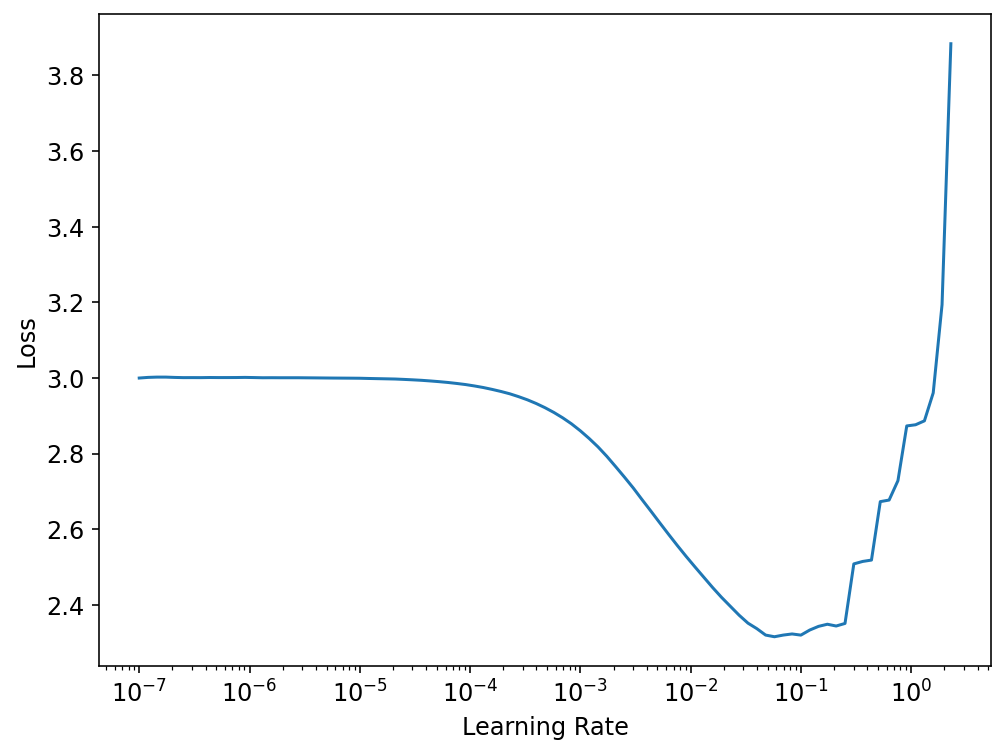

In [49]:
learn.lr_find()

In [50]:
learn.fit_one_cycle(7, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.598516,1.426555,0.486330,00:04
1,1.249190,1.126379,0.579643,00:03
2,1.073266,1.060657,0.605746,00:03
3,0.952672,1.025686,0.624380,00:03
4,0.852610,0.995982,0.643488,00:03
5,0.756959,0.992377,0.658248,00:03
6,0.681088,0.996492,0.662588,00:03


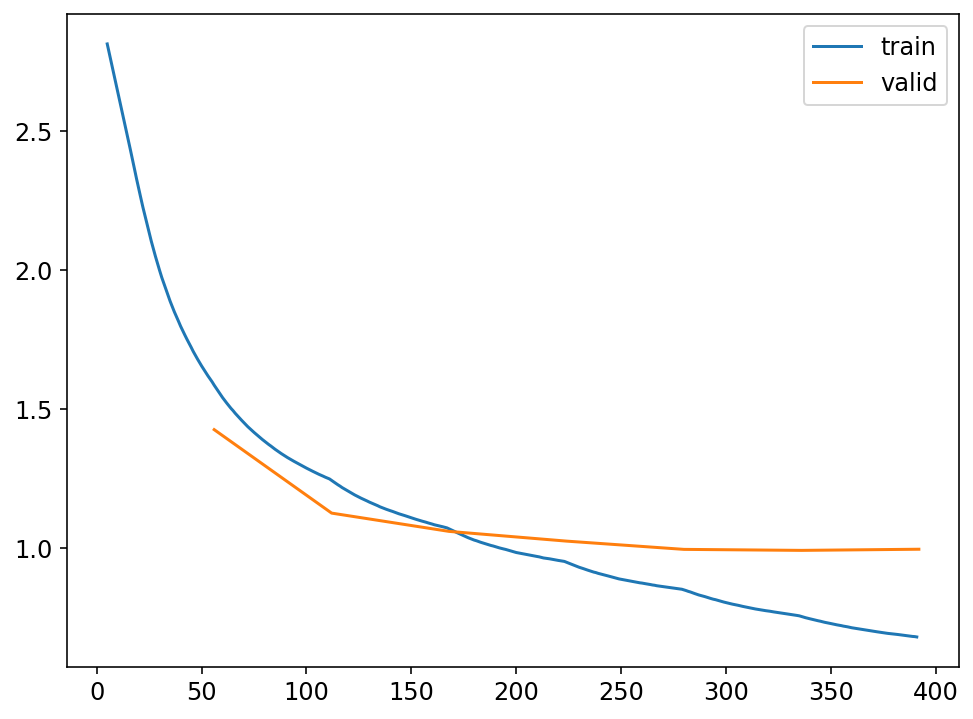

In [51]:
learn.recorder.plot_loss()

In [52]:
interp = ClassificationInterpretation.from_learner(learn)


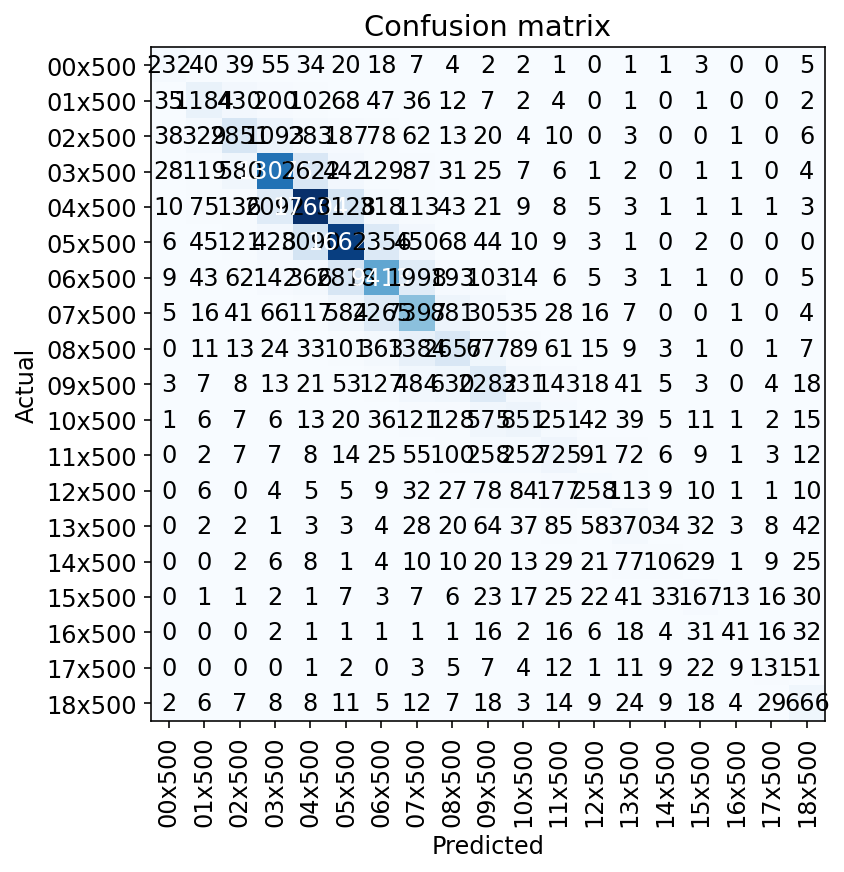

In [53]:
interp.plot_confusion_matrix()

In [54]:
interp.print_classification_report()

              precision    recall  f1-score   support

      00x500       0.63      0.50      0.56       464
      01x500       0.63      0.56      0.59      2131
      02x500       0.66      0.57      0.61      4978
      03x500       0.76      0.76      0.76     17160
      04x500       0.72      0.75      0.74     23572
      05x500       0.69      0.71      0.70     23254
      06x500       0.62      0.62      0.62     15182
      07x500       0.60      0.63      0.62     11768
      08x500       0.55      0.49      0.52      5449
      09x500       0.50      0.54      0.52      4191
      10x500       0.48      0.40      0.44      2130
      11x500       0.45      0.44      0.45      1647
      12x500       0.45      0.31      0.37       829
      13x500       0.44      0.46      0.45       796
      14x500       0.47      0.29      0.36       371
      15x500       0.49      0.40      0.44       415
      16x500       0.53      0.22      0.31       189
      17x500       0.59    

## try regression

In [55]:
dls = TabularDataLoaders.from_csv(path/'data.csv', 
                                  y_names="price",
                                  cat_names = ['housing', 
                                               'district', 
                                               'bedrooms', 
                                               'type', 
                                               'catsok', 
                                               'dogsok', 
                                               'garagea', 
                                               'garaged', 
                                               'furnished', 
                                               'laundryb', 
                                               'laundrys', 
                                               'wd',
                                               "nthumbs",
                                              ],
                                  cont_names = ['latitude', 'longitude', 'area'],
                                  procs = [Categorify, FillMissing, Normalize],
                                 bs=8192)

In [56]:
dls.show_batch()

,housing,district,bedrooms,type,catsok,dogsok,garagea,garaged,furnished,laundryb,laundrys,wd,nthumbs,latitude_na,longitude_na,area_na,latitude,longitude,area,price
0,565ft2,san jose north,#na#,apartment,True,True,False,True,False,False,False,True,11,False,False,False,37.399849,-121.920265,564.999985,2464.0
1,2br,san jose west,#na#,apartment,False,False,False,False,False,False,True,False,12,False,False,True,37.304817,-121.918983,897.999998,2550.0
2,#na#,tenderloin,#na#,apartment,True,True,False,False,False,True,False,False,12,False,False,True,37.782623,-122.415390,897.999998,2195.0
3,1br - 760ft2,redwood city,1,apartment,False,False,False,False,False,False,False,False,10,False,False,False,37.464451,-122.224190,760.000007,2885.0
4,4br - 1500ft2,inner richmond,4,apartment,False,False,True,False,False,True,False,False,16,False,False,False,37.776669,-122.458588,1499.999999,5000.0
5,3br,cupertino,#na#,house,False,False,False,False,False,False,False,False,8,False,False,True,37.336617,-122.060371,897.999998,3900.0
6,2br - 826ft2,mountain view,2,apartment,False,False,False,False,False,False,True,False,24,False,False,False,37.397488,-122.097458,826.000007,2795.0
7,3br - 840ft2,laurel hts / presidio,3,apartment,False,False,False,False,False,False,False,False,15,False,False,False,37.791542,-122.480652,839.999997,3900.0
8,2br - 1098ft2,walnut creek,2,apartment,True,True,False,False,False,False,False,True,11,False,False,False,37.918201,-122.071701,1097.999998,3550.0
9,2br - 1206ft2,los gatos,2,apartment,True,True,False,False,False,False,False,True,19,False,False,False,37.241699,-121.955399,1205.999993,4489.0


In [57]:
learn = tabular_learner(dls, y_range=(0,9500), 
                        layers=[500,250, 100], 
                        n_out=1, 
                        loss_func=F.mse_loss,
                        metrics=F.l1_loss
                       )

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0005754399462603033)

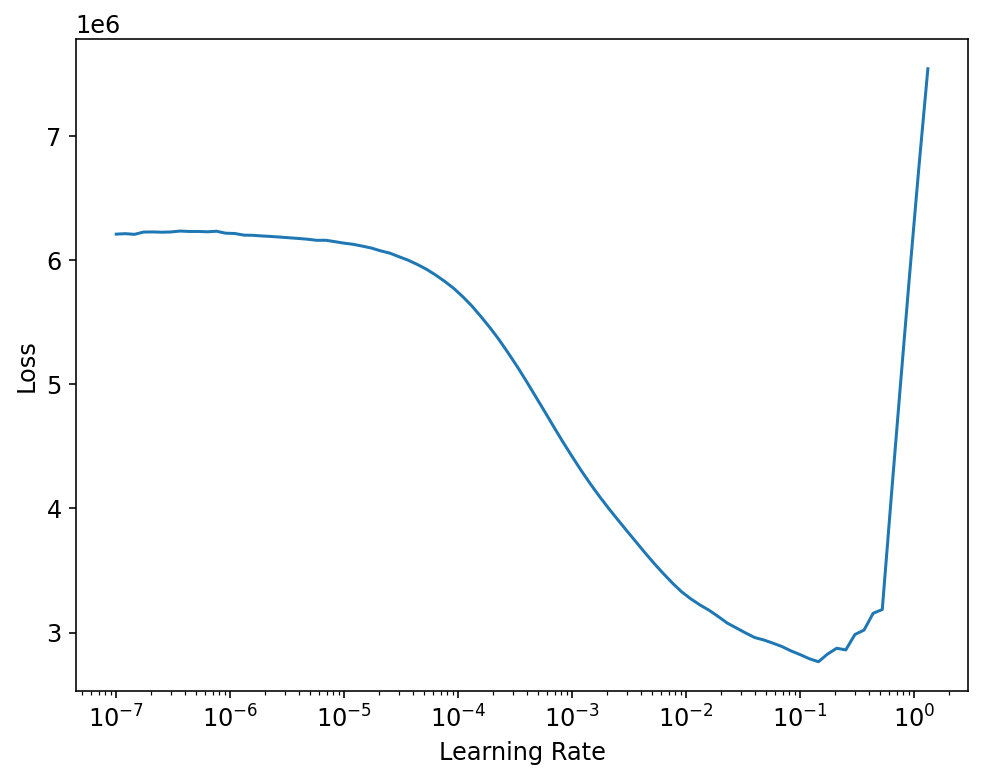

In [58]:
learn.lr_find()

In [59]:
learn.fit_one_cycle(35, 1e-02, wd=0.1)

epoch,train_loss,valid_loss,l1_loss,time
0,713547.437500,1396477.875000,810.649414,00:03
1,435718.312500,385697.750000,372.360901,00:03
2,347129.437500,349884.531250,362.809601,00:03
3,314021.593750,355179.250000,365.645172,00:03
4,297618.562500,346722.281250,363.324890,00:03
5,282174.187500,333495.718750,355.162201,00:03
6,266376.250000,316902.562500,344.071686,00:04
7,251480.093750,311829.531250,337.594818,00:03
8,239792.484375,301408.187500,325.093353,00:03
9,228461.734375,308810.968750,340.140808,00:03


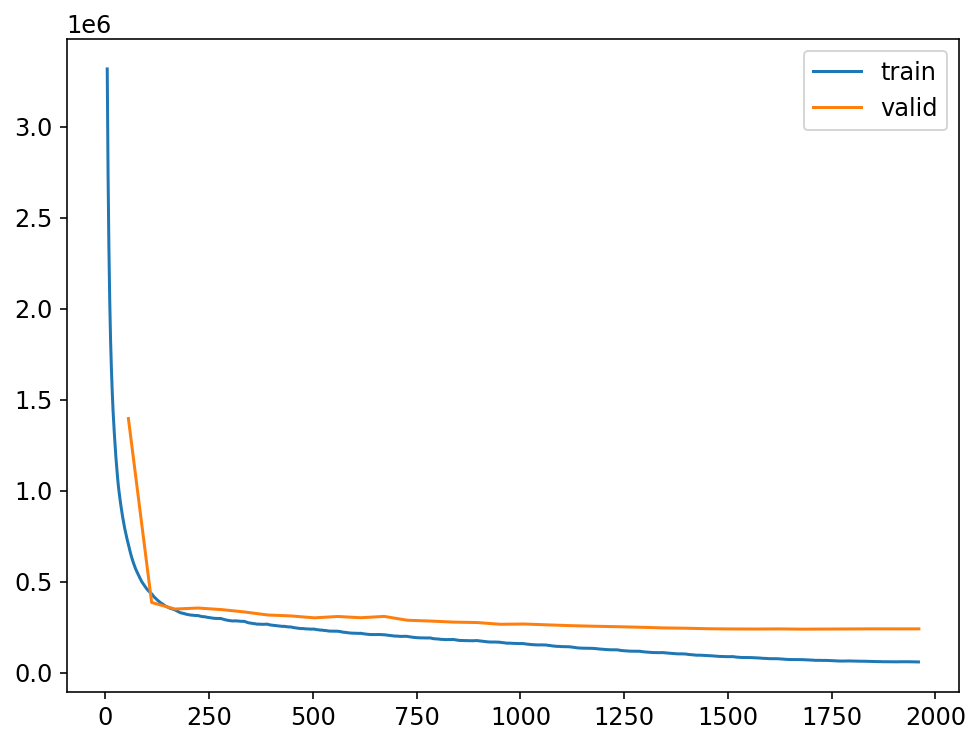

In [60]:
learn.recorder.plot_loss()

In [61]:
learn.export(fname="cltab.pkl")